
# 本周内容的概括：
 - 马尔可夫决策过程
-  走格子的那个

# 1. 基础概念

本周的内容是关于在网格世界里移动

 - 转移模型：描述当前状态采取指定行动后会转化成什么后态
   - 转移模型可以用贝叶斯网络表示
 - 马尔可夫假设：从当前态转移到后态的似然度只取决于当前态，而不取决于历史的状态。
 - 奖励：每个状态有一个对应的奖励值
 - 价值函数：所有收到的奖励的总和。

马尔可夫决策过程（MDP）需要以下组件：
 - 状态
 - 起始状态
 - 可能的行动
 - 在某状态下采取某行动的几率
 - 奖励
 - 终点
 - 价值函数

政策$\pi$：

 - 政策就是解，描述机器人在每个状态下该干啥
 - 最佳的政策就是产生最高的预期效果的政策，用$\pi^*$表示


价值函数$U$

 - 有限还是无限（时间）？
 - 有限horizon：
   - 在第N步之后价值函数就不改变了
   - 会产生非稳态（non-stationary）的最佳政策
   - N很重要
 - 无限horion：
   - 会获得stationary的最佳政策
   - 不代表一定就会得到无限长的政策，只是代表没有死线
   - 如果有两个有同样初始状态的政策，那这俩政策分出好坏来就在产生分歧之后

奖励

- 相加性（Additive）的奖励
  - 状态序列的价值函数是连加所有状态奖励的和
  - 会导致一个问题：这么算人的工资是$\infty$，这下永生了
- 打了折扣的（Discounted）奖励
  - 未来的奖励不如近处的奖励重要，越往后得到的奖励越是乘以一个小的系数
  - 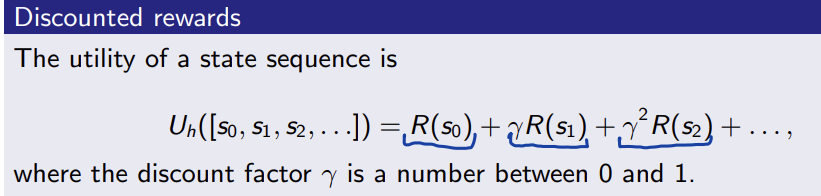
  - 题目中要求带着折扣算其实就是贝尔曼后面的max乘了一个gamma，也就是后态*gamma。
- 无限horizoon的奖励
  - 无限长度的序列会产生无限大的收益，怎么比较了？
    - 解1：discounted可以解决
    - 解2：如果一定能在有限步内抵达终点，那其实不是真的无限
    - 解3：比较每步的平均奖励值

总结：
 - MDP允许对复杂的决策进行建模
 - 前进到某个后态的似然度只取决于前态
 - 每个状态有一个奖励
 - 可以计算一系列状态的奖励和（价值）

# 2. 最优政策及其寻找方式

 - 定义：分享所有起始状态的政策里预测效果最好的那个
  
  
  如果使用discount和无限horizon：最优政策与起始状态是谁无关
 - 如果一个政策从不同起始状态到达同一状态时做出的决定是一样的，那这个政策就是最优政策
 - 状态的真价值（Ultility）：机器人执行最优政策后得到的discounted价值

问题：怎么得到最优政策呢？


法一：value迭代

 - 核心思想：计算每个状态的ultility，并基于ultility选择最佳的动作。
   - 最佳政策就是能最大化预期奖励（reward）的政策。预期政策是带discount的。
   - 每个政策都是一个树：父节点是前态，子节点是后态，边上是状态转移的可能性。
  
预测分为两步：
1. 对于树上的每个路径，算出所有关节可能性的乘积，计算discounted reward
2. 把上述得到的所有积求和

U和R的一些说明
 - R只代表当前状态的效果
 - U不仅包含当前，也包含未来，反映了长期的优势，也反映了从当前出发能做什么
 - **终态的U就等于其R，因为没有后续了**

贝尔曼方程：

$$

U(s) = R(s) + max(P(转移到后态)*U(后态))

$$

价值迭代的算法：

n个状态，每个状态都有一个自己的U

 - 给所有节点的U赋任意初值
 - 用贝尔曼方程不断更新全图
 - **从终态往外捋，第一次的时候节点可以去没算过的节点**
 - **不要用混U和R，R是不变的，不要把R代入成当前格子的U**
 - 最后会收敛到一个唯一且正确的解上
 - 最后就挑高的格子走就行了

法二：政策迭代

 - 核心思想：如果有一个行动显然优于其他行动，那不用非得算得特别精确

分为两步：
1. 政策评估：对于一个政策，计算其被执行后每个状态的U
2. 政策改进：计算一个新的MEU政策，进行one-step look ahead
3. 当政策改进不能带来U的变化时，算法停止

如何评估政策的好坏？
 - 比算贝尔曼方程简单，每个状态的行动都被政策特定了
 - 去除贝尔曼中的$max()$，因为每一步都是确定的



> 两个方法的比较：
>  - 政策迭代中式子是线性的（没有max了）
>  - 对于有n个状态的情况，政策迭代的时间复杂度是$O(n^3)$

> 什么时候用政策迭代？
>  - 状态空间小的时候
>  - 状态空间大的时候，$O(n^3)$就不得了了
>  - 状态空间大的时候用价值迭代
>
>  - 如果状态空间太大：用近似解吧，差不多得了


> 总结：
>   MDP确实可以，但是有以下的前提条件： 
> 
>    - 我们知道状态转移的P
>    - 我们知道各个状态的R


--- 那如果不知道呢？上强化学习。像婴儿一样学习。

# 3. 强化学习

 - 行动的结果未知
 - 奖励、惩罚都不频繁，一般是在一系列行动的最后
 - 学习者要决定采取什么行动
 - 世界又大又复杂

> 强化学习是我们在世界模型未知，奖惩有延迟的时候使用的方法。

基础方法：

> 探索vs利用。
> > - 利用：根据受过训练的训练的模型，最大化现在的期望U
> >   - 如何利用：跟随政策
> > - 探索：选择一个能帮你改进模型的行动
> >   - 如何探索？选择随机行动，选择没选过的行动，选择一个会导向未探索过的状态的行动
> >   - 何时探索？

> 基于模型的强化学习：
>  - Learn MDP
>  - 解算MDP来确定最优政策
>  - 将预期回报和实际回报之间的差作为一个误差信号

> 无模型的强化学习
>  - 直接学习价值（ultility）函数：Q学习，TD学习
 

> Q学习
> > 用一个Q（s,a）函数评估处在当前状态有多好，采取行动，然后跟随政策
>
> 算法：
> > 1. 随机初始化Q
> > 2. 以任意形式选取行动，使所有状态的所有行动都被选取过
> > 3. 每个时间步，改变Q的一个元素
> $$Q(s_t,a_t) = Q(s_t,a_t)+\alpha(R+\gamma maxa_{a}Q(s_{t+1},a)-Q(s_t,a_t))$$
> 人话：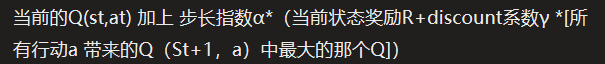  
> 如果有需要，步长指数$\alpha$可以随时间的推进而缩小  
> Q学习会收敛于最佳的行动-价值函数（Q函数）  

> 深度Q学习
> 用神经网络权重W估计一个行动-价值函数Q(s,a,w)，也就是用神经网络推算Q（s,a）
>
> 用Q的均方差定义一个目标函数L，然后用L对权重的梯度梯度下降优化

# 4. 作业


## 4.1 对于下图的grid world：
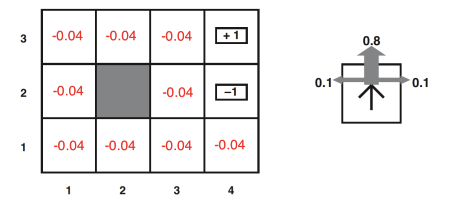

(a): 我们是非得等收敛才能知道所有状态的ultility，还是说有的状态的ultility现在已经知道了？  
(b): 加入我们将所有状态的ultility初始化为0，然后迭代一次，那各个状态的ultility值都是多少

解：

(a): 终点的奖励已知  
(b): U（t+1） = R+max U，但是所有U都是0，所以迭代一次就全部是R  



In [10]:
result = -0.04+0.8*(0.2679)-0.1*0.04-0.1*0.04
print(result)

0.16632000000000002


## 4.2 对于以下的格子世界：

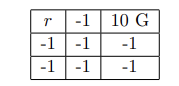

状态转移模型同上（80%去目标，10%左，10%右）

discounted参数$\gamma = 0.99$

不用计算，用常识也能给出结果

（a）给出r = -3时的政策结果

（b）给出r = 3时的政策结果

解：  
（a）:  
agent会不断往右走，如果到了最右一列，就往上。这是为了躲开惩罚因子


（b）:  
迭代之后由于终点的不变，外面的会变得非常大，然后节点会优先采取远离终点的行动。


## 4.3 
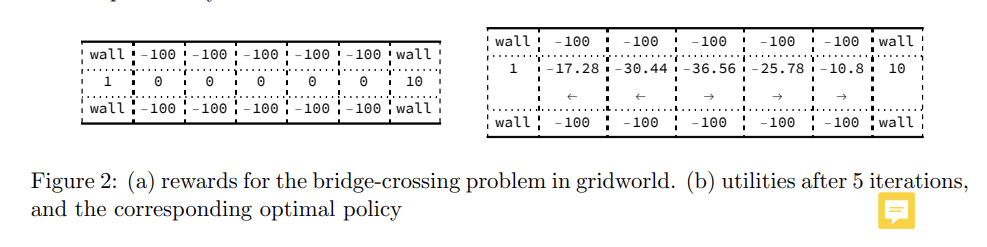
对于上图所示的桥，机器人从左手边出发，目标是最右边。最右的终点奖励是10，其他的-100也是终点节点。状态转移模型还是和上面一样

(a):折扣值0.9，算出第一次和第二次行动之后的ultility

(b):问题指向第二张图中显现的最优政策，其不能跨过桥梁。减少折扣值会产生什么影响？

(c):增加终点的奖励会有什么影响？选一个能过桥的值，然后给出每个格子在三次迭代后的ultility值

注：一个迭代/行动就是对所有格子算一次ultility

In [23]:
# 计算器
R= 0
R_next= 10
gamma = 0.9
result = R+gamma*(0.8*R_next-0.1*100-0.1*100)

print(result)

-36.561600000000006


解：

（a）：详见答案

（b）：减少折扣值也不会能让他跨过桥梁

（c）: 超级层架终点值就可以过桥了